<h1>
    Cuadratura Gaussiana
</h1>

<h2>
    Materia: Análisis numérico<br/>
    Grupo: $\eta$
</h2>

<h5>
    Integrantes:
        <ul>
            <li>Alexis Rafael Bolaños Mejia</li>
            <li>Ricardo Javier Beltrán Martínez</li>
            <li>Paola Carolina Domínguez Díaz</li>
            <li>José Francisco Cerón Pouzeaud</li>
        </ul>
</h5>

### Introducción: Teorema de Cuadratura Gaussiana

$$ \int_{a}^{b}
\mathbf{f(x)}dx
\approx \mathbf{Q(f)}= \sum_{i=1}^{n}w_{i}f(x_{i})$$

1. Definición:
    - El método de Cuadratura Gaussiana tiene como idea fundamental la aproximación de una integral definida con respecto a una función, tomando en cuenta que se deben seleccionar nodos interpolantes. Con lo anteriormente mencionado, la cuadratura debe recibir puntos de evaluación óptimos, ya que el resultado que obtendremos será de la forma ***2n-1***,tomando en cuenta que serán distribuidos para los puntos $x_{i}$ y los coeficientes $w_{i}$
$$ \int_{a}^{b}
\mathbf{f(x)}dx
= w_{0}f(x_{0})+w_{1}f(x_{1})+w_{2}f(x_{2})+...+w_{n}f(x_{n})$$

    El método de Gauss, toma como conjunto ortogonal a los polinomios de Legrendre que son ortogonales en el intérvalo [-1,1] que están dados por:
    $$\mathbf{L_{n}(t)}=\frac{1}{{2}^n*n!}\frac{{d}^n}{{dx}^n}*{({t}^2-1)}^n$$
    O en su forma recursiva:
    $$\mathbf{L_{n}(t)}=\frac{(2k+1)*t*L_{n}(t)-k*L_{k-1}(t)}{{k+1}}$$
    Con $$\mathbf{L_{0}(t)}=1 , \mathbf{L_{1}(t)}=t $$
    
    Tal cuadratura dará resultados muy precisos si y solo si $\mathbf{f(x)}$ es aproximada por un polinomio dentro del rango [-1,1]. La función puede ser escrita como $\mathbf{f(x)}=W(x)g(x)$, donde $\mathbf{g(x)}$ tomará valores de un polinomio  aproximado y $\mathbf{W(x)}$ es conocido.
    $$ \int_{a}^{b}
\mathbf{f(x)}dx
= \int_{1}^{-1}\mathbf{W(t)}\mathbf{g(t)}dt \approx \sum_{i=1}^{n}g(t_{i})w_{i}$$

    Con esto, se deben hacer ajustes de variables. Debemos encontra la ecuación de la recta que pasa por los puntos **(1,b)** y **(1,a)**:
    $$x=\frac{b-a}{{2}}*(t+1)+a$$ Y su derivada es: $$\frac{dx}{dt}=\frac{b-a}{2}$$
    Entonces podemos plantear lo siguiente:
    $$ \int_{a}^{b} \mathbf{f(x)}dx=\frac{b-a}{2}*\int_{1}^{-1}f(\frac{b-a}{{2}}*(t+1)+a)*dt$$

    => $$ \int_{a}^{b} \mathbf{f(x)}dx=\frac{b-a}{2}*\int_{1}^{-1}f(\frac{b-a}{{2}}*(t+1)+a)*dt = (\frac{b-a}{2})\sum_{i=1}^{n}w_{i}f(x(t_{i}))$$
    
    Donde $t_{i}$ son las raíces del polinomio de Legendre.
   

2. Error:
   - Los nodos elegidos para realizar el teorema deben reducir en lo posible el error cometido al efectuar la aproximación. El error está definido por la siguiente ecuación:
   $$\mathbf{E_{n}}(f(x))=\int_{a}^{b} (\mathbf{f(x)-P(x)})dx =\int_{a}^{b} \mathbf{z_{n}(x)}dx\frac{f_{(n)}(\xi)}{{n!}}dx$$
   donde $\xi$ es un número dentro del intérvalo de [a,b] y  $\mathbf{z_{n}(x)}={(x-x_{1})}{(x-x_{2})}...{(x-x_{n})}$ es el polinomio fundamental de interpolación. Si $\mathbf{f(x)}$ es un polinomio de grado menor que n-1 entonces el error será cero por utilizar **n** nodos y por lo tanto el grado de precisión será ${n-1}$.


3. Eficiencia del método:
   - La fórmula de la cuadratura tiene grado de precisión ${d}$ si es exacta para todo polinomio de grado menor o igual que  ${d}$. Una fórmula de tipo interpolatorio con **n** nodos posee al menos grado de precisión ${n-1}$. 
       Esto puede probarse mediante la teoría de polinomios ortogonales, que no puede contruirse una fórmula de tipo interpolatorio con **n** nodos y grado de precisión ${2n-1}$ y es asi como se prueba la eficiencia del metodo ya que las formulas de la cuadratura gaussinas son las que alcanzan dicho grado de precisión óptimo.

4. Ventajas y desventajas:
    - El teorema de Cuadratura Gaussiana brunda mayor precisión que los métodos de Trapecio y Simpson, aunque en ocasiones es necesario utilizar un polinomio de mayor grado para alcanzarla.
    - No es posible aplicarlo en casos discretos.
    - Es necesario conocer las raíces y los pesos para los polinomios interpolantes de Lagrange.
    - Usar un polinomio de mayor grado no garantizará una mejor precisión. No es posible estimar el error sin conocer el resultado exacto.

<h3>
    Ejemplo de cuadratura Gaussiana para 2 puntos
</h3>

$$
I=\int_{0}^3 \frac{e^xsin(x)}{1+x^2}dx
$$

$$
z=\frac{2x-(a+b)}{b-a}=\frac{2x-(0+3)}{3-0}=\frac{2x-3}{3}
$$

Luego cambiando la variable y el diferencial:

$$
x=\frac{3-0}{2}z+\frac{0+3}{2}=\frac{3}{2}z+\frac{3}{2}
$$

$$
dx=\frac{b-a}{2}dz=\frac{3-0}{2}dz=\frac{3}{2}dz
$$

Aplicando en la formula:

$$
I=\int_{0}^3 \frac{e^xsin(x)}{1+x^2}dx=\frac{3}{2}\int_{-1}^1f(\frac{3}{2}z+\frac{3}{2})dz
$$

$$
I=\frac{3}{2}\sum_{i=1}^{n} w_{i}f(\frac{3}{2}z_i+\frac{3}{2})
$$

$Puntos: 2$

$w_1=w_2=1.0$

$-z_1=z_2= 0.577350269$



Evaluando los coeficientes $z_i$
$$
f(x)=\frac{e^xsin(x)}{1+x**2}
$$

$$
f(\frac{3}{2}z_i+\frac{3}{2})=\frac{e^(\frac{3}{2}z_i+\frac{3}{2})sin(\frac{3}{2}z_i+\frac{3}{2})}{1+(\frac{3}{2}z_i+\frac{3}{2})^2}
$$

$$
f(\frac{3}{3}z_1+\frac{3}{2})=f(\frac{3}{2}(-0.5773502669)+\frac{3}{2})=0.796501031
$$

$$
f(\frac{3}{3}z_2+\frac{3}{2})=f(\frac{3}{2}(0.5773502669)+\frac{3}{2})=1.130596636
$$

Reemplazando en la formula:

$$
I=\frac{3}{2}\sum_{i=1}^{2}w_if(\frac{3}{2}z_i+\frac{3}{2})=\frac{3}{2}[w_if(\frac{3}{2}z_1+\frac{3}{2})+f(\frac{3}{2}z_2+\frac{3}{2})]
$$

$$
I=\frac{3}{2}[(1.0)(0.796501031)+(1.0)(1.130596636)]
$$

$$
I=2.890646501
$$

<h3>
Ejemplo de cuadratura Gaussiana para 3 puntos
</h3>

Utilizando los coeficientes de cuadratura de Gauss para tres puntos:

$Puntos: 3$

$w_2=0.888888888$

$w_1=w_3=0.555555555$

$-z_1=z_3=0.774593669$

$z_2=0.0$

Evaluando los coeficientes $z_i$:
$$
f(\frac{3}{2}z_1+\frac{3}{2})=f(\frac{3}{2}(-0.774593669)+\frac{3}{2})=0.417427370
$$

$$
f(\frac{3}{2}z_2+\frac{3}{2})=f(\frac{3}{2}(0.0)+\frac{3}{2})=1.375526886
$$

$$
f(\frac{3}{2}z_3+\frac{3}{2})=f(\frac{3}{2}(0.774593669)+\frac{3}{2})=0.817550554
$$

Reemplazando en la formula:

$$
I=\frac{3}{2}\sum_{i=1}^{3}w_if(\frac{3}{2}z_i+\frac{3}{2})=\frac{3}{2}[w_1f(\frac{3}{2}z_1+\frac{3}{2})+w_2f(\frac{3}{2}z_2+\frac{3}{2})+w_3f(\frac{3}{2}z_3+\frac{3}{2})]
$$

$$
I=\frac{3}{2}[(0.555555555)(0.417427370)+(0.8888888)(1.375526886)+(0.555555555)(0.817550554)]
$$

$$
I=2.863184115
$$

<h3>
    Ejemplo de cuadratura Gaussiana para 4 puntos
</h3>

Utilizando los coeficientes de cuadratura de Gauss para cuatro puntos:

$Puntos: 4$

$w_i: w_1=w_4=0.347854845$

$w_2=w_3=0.652451155$

$-z_1=z_4=0.861136312$

$-z_2=z_3=0.339981044$

Evaluando los coeficientes $z_i$:

$$
f(\frac{3}{2}z_1+\frac{3}{2})=f(\frac{3}{2}(-0.861136312)+\frac{3}{2})=0.244090630
$$

$$
f(\frac{3}{2}z_2+\frac{3}{2})=f(\frac{3}{2}(-0.339981044)+\frac{3}{2})=1.136298128
$$

$$
f(\frac{3}{2}z_3+\frac{3}{2})=f(\frac{3}{2}(0.339981044)+\frac{3}{2})=1.340257031
$$

$$
f(\frac{3}{2}z_4+\frac{3}{2})=f(\frac{3}{2}(0.861136312)+\frac{3}{2})=0.635749619
$$

Reemplazando en la formula:

$$
I=\frac{3}{2}\sum_{j=1}^{4} w_{i}f(\frac{3}{2}z_{i}+\frac{3}{2})
$$

$$
I=\frac{3}{2}[w_{1}f(\frac{3}{2}z_{1}+\frac{3}{2})+w_{2}f(\frac{3}{2}z_{2}+\frac{3}{2})+w_{3}f(\frac{3}{2}z_{3}+\frac{3}{2})+w_{4}f(\frac{3}{2}z_{4}+\frac{3}{2})]
$$

$$
I=\frac{3}{2}[(0.347854845)(0.244090630)+(0.652451155)(1.136298128)+(0.652451155)(1.340257031)+(0.347854845)(0.635749619)]
$$

$$
I=2.882831951
$$

<h4>
    Algoritmo para la Cuadratura Gaussiana
</h4>

El siguiente código trabaja con el siguiente problema:
    $
        \int_{1}^3\sqrt{x}\sin(x)
    $
. Para 2 nodos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
def integraCuadGauss2p(funcionx,a,b):
    x0 = -1/np.sqrt(3)
    x1 = -x0
    xa = (b+a)/2 + (b-a)/2*(x0)
    xb = (b+a)/2 + (b-a)/2*(x1)
    area = ((b-a)/2)*(funcionx(xa) + funcionx(xb))
    return(area)

In [4]:
# Funcion
fx = lambda x: np.sqrt(x)*np.sin(x)

In [5]:
# intervalos
a = 1
b = 3
tramos = 4

In [6]:
muestras = tramos+1
xi = np.linspace(a,b,muestras)
area = 0
for i in range(0,muestras-1,1):
    deltaA = integraCuadGauss2p(fx,xi[i],xi[i+1])
    area = area + deltaA

In [7]:
# salida
print('Integral: ', area)

Integral:  2.0535771900286597


<h4>
    Código para generar la gráfica
</h4>

In [8]:
x0 = -1/np.sqrt(3) 
x1 = 1/np.sqrt(3)

In [9]:
# arregos para gráficas
xi = np.array([])
fi = np.array([])
xat = np.array([])
xbt = np.array([])

In [10]:
recta = np.array([])

In [11]:
muestrastramo = 10
subtramo = np.linspace(a,b,muestras)

In [12]:
for i in range(0,tramos,1):
    at = subtramo[i]
    bt = subtramo[i+1]
    
    xit = np.linspace(at,bt,muestrastramo)
    fit = fx(xit)
    
    xi = np.concatenate((xi,xit))
    fi = np.concatenate((fi,fit))

    # puntos xa y xb por tramo
    xa = (bt+at)/2 + (bt-at)/2*(x0)
    xb = (bt+at)/2 + (bt-at)/2*(x1)
    
    xat = np.concatenate((xat,[xa]))
    xbt = np.concatenate((xbt,[xb]))
    
    # Recta entre puntos x0 y x1 por tramo
    m = (fx(xb)-fx(xa))/(xb-xa)
    b0 = fx(xa)- m*xa
    linea = b0 + m*xit
    recta = np.concatenate((recta,linea))

In [13]:
# Marcadores 'o' de xa y xb por tramos
puntox = np.concatenate((xat,xbt))
puntoy = fx(puntox)

<h4>
    Generando la gráfica
</h4>

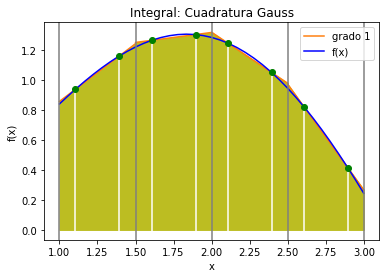

In [14]:
# Trazado de lineas
plt.plot(xi,recta, label = 'grado 1', color = 'tab:orange')
plt.fill_between(xi,0,recta, color='tab:olive')
plt.plot(xi,fi, label='f(x)', color = 'blue')

# Verticales para dividir los tramos
for j in range(0,len(subtramo),1):
    plt.axvline(subtramo[j], color='tab:gray')
    
# Marcadores de puntos xa y xb por tramos
for j in range(0,len(xat),1):
    plt.axvline(xat[j], color='w')
    plt.axvline(xbt[j], color='w')
    
plt.plot(puntox,puntoy, 'o', color='g')

plt.title('Integral: Cuadratura Gauss')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()

### Código del Método de Cuadratura Gaussiana

El siguiente código a mostrar ha sido elaborado para poder ingresar cualquier función $\mathbf{f(x)}$ con $n$ cantidad de nodos a calcular.

In [ ]:
def gaussian_quadrature(fx, a, b, n):
    [roots, weights] = np.polynomial.legendre.leggauss(n)

    values = [
        wi * fx.subs({"x": ((b - a) / 2) * xi + ((a + b) / 2)}).evalf()
        for (xi, wi) in zip(roots, weights)
    ]

    return ((b - a) / 2) * sum(values)


print("Cuadratura Gaussiana: ")
s = input("Ingrese f(x) a integrar: ")
f = sympify(s)

a = int(input("Ingrese limite inferior (a): "))
b = int(input("Ingrese limite superior (b): "))
n = int(input("Ingrese el numero de nodos: "))

# Approximated area
res = gaussian_quadrature(f, a, b, n)
print('Resultado: {}'.format(res))

print('Renderizando grafica...')

# Gaussian Quadrature plot
[roots, _] = np.polynomial.legendre.leggauss(n)
gauss_xs = [((b - a) / 2) * xi + ((a + b) / 2) for xi in roots]
gauss_ys = [f.subs({'x': xi}).evalf() for xi in gauss_xs]

plt.plot(gauss_xs, gauss_ys, 'ro', label="Nodos de interpolación")
plt.plot(gauss_xs, gauss_ys, 'r--', label="Solución Númerica")

# Analytical plot
xs = np.arange(a, b, 0.2)
ys = [f.subs({'x': x}).evalf() for x in xs]

plt.plot(xs, ys, label="Solución analítica")
plt.title('f(x) = {}'.format(s))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

<h4>Bibliografia</h4> 

María Penkova Vassileva.(2011). Métodos iterativos eficientes para la resolucion de sistemas no lineales.[Universidad politecnica de valencia]

    

Edison del Rosario(12 de julio del 2012).Métodos numéricos.Recuperado de http://blog.espol.edu.ec/analisisnumerico/cuadratura-de-gauss/

Borras, H., Duran, R., y Iriarte, R. (1984). Apuntes de métodos numéricos (F. de Ingeniería UNAM,
Ed.).

García B., S. (2017). Métodos numéricos.